
# 📌 Introduction

HireAI is a machine learning-driven employment forecasting system designed to help job seekers assess their employability. 
By analyzing various factors such as education, experience, and technical skills, the model predicts the likelihood of a candidate getting hired.
This project aims to make the hiring process more data-driven and insightful for both applicants and recruiters.



# 🎯 Objectives

The main objectives of this project are:
- Develop a robust machine learning model to predict employability status.
- Analyze key factors that influence hiring decisions.
- Implement various ML algorithms such as Logistic Regression, Decision Tree, and SVM for better accuracy.
- Deploy the model using Flask to provide a user-friendly interface for job seekers.
- Offer data-driven insights to improve employability outcomes.


# Importing the Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

# Importing and Cleaning the Dataset

In [3]:
dataset = pd.read_csv(r"C:\Users\tanve\OneDrive\Desktop\HireAI/employability_dataset.csv", delimiter=";")

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      73462 non-null  int64 
 1   Age             73462 non-null  object
 2   Accessibility   73462 non-null  object
 3   EdLevel         73462 non-null  object
 4   Employment      73462 non-null  int64 
 5   Gender          73462 non-null  object
 6   MentalHealth    73462 non-null  object
 7   MainBranch      73462 non-null  object
 8   YearsCode       73462 non-null  int64 
 9   YearsCodePro    73462 non-null  int64 
 10  Country         73462 non-null  object
 11  PreviousSalary  73462 non-null  object
 12  HaveWorkedWith  73399 non-null  object
 13  ComputerSkills  73462 non-null  int64 
 14  Employed        73462 non-null  int64 
dtypes: int64(6), object(9)
memory usage: 8.4+ MB


In [5]:
dataset.drop(columns = "Unnamed: 0", inplace = True)
dataset.drop(columns = "HaveWorkedWith", inplace = True)
dataset.drop(columns = 'YearsCodePro', inplace = True)

In [6]:
dataset['PreviousSalary'] = dataset['PreviousSalary'].str.replace(',','.').astype(float).astype(int)

In [7]:
dataset.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,Country,PreviousSalary,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,8,Afghanistan,9792,9,0
1,<35,No,Undergraduate,1,Man,Yes,Dev,5,Nepal,4200,9,0
2,<35,No,Undergraduate,1,Man,No,Dev,6,Nepal,4200,9,1
3,<35,Yes,Undergraduate,1,Man,No,Dev,3,Pakistan,3108,9,0
4,<35,No,Undergraduate,1,Man,No,Dev,5,Pakistan,3108,9,0


In [8]:
def Countries(country):

    if country in ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica',
    'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala',
    'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis',
    'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States of America']:
        return 'North_America'

    elif country in ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina',
    'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
    'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy',
    'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta',
    'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway',
    'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia',
    'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City']:
        return 'Europe'

    elif country in ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana',
    'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']:
        return 'South_America'

    elif country in ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan',
    'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia',
    'Iran, Islamic Republic of...', 'Iraq', 'Israel', 'Japan', 'Jordan',
    'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives',
    'Mongolia', 'Myanmar (Burma)', 'Nepal', 'North Korea', 'Oman', 'Pakistan',
    'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore',
    'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand',
    'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan',
    'Vietnam', 'Yemen']:
        return 'Asia'

    elif country in ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru',
    'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands',
    'Tonga', 'Tuvalu', 'Vanuatu']:
        return 'Oceania'

    elif country in ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
    'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
    'Congo, Republic of the...', 'Congo, Democratic Republic of the...', 'Djibouti',
    'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon',
    'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast (Côte d\'Ivoire)', 'Kenya',
    'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
    'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
    'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia',
    'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda',
    'Zambia', 'Zimbabwe']:
        return 'Africa'

    else:
        return 'Others'

dataset['Continent'] = dataset['Country'].apply(Countries)

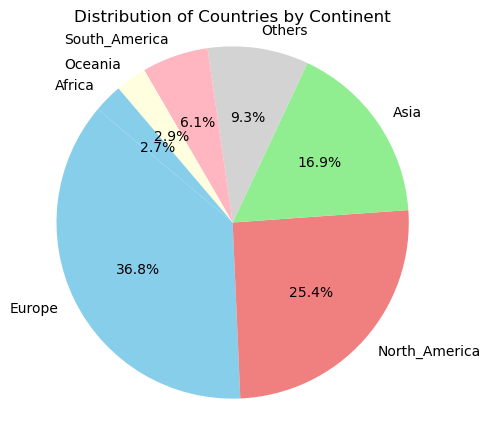

In [9]:
continent_counts = dataset['Continent'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightgray', 'lightpink', 'lightyellow'])
plt.title('Distribution of Countries by Continent')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()

In [10]:
dataset.Continent.unique()

array(['Asia', 'Europe', 'North_America', 'Others', 'South_America',
       'Africa', 'Oceania'], dtype=object)

In [11]:
dataset.drop(columns = 'Country', inplace = True)

In [12]:
dataset.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,PreviousSalary,ComputerSkills,Employed,Continent
0,<35,No,Master,1,Man,No,Dev,8,9792,9,0,Asia
1,<35,No,Undergraduate,1,Man,Yes,Dev,5,4200,9,0,Asia
2,<35,No,Undergraduate,1,Man,No,Dev,6,4200,9,1,Asia
3,<35,Yes,Undergraduate,1,Man,No,Dev,3,3108,9,0,Asia
4,<35,No,Undergraduate,1,Man,No,Dev,5,3108,9,0,Asia


# Encoding categorical data

In [13]:
category_cols = ['Age', 'Accessibility', 'MentalHealth',
       'MainBranch']

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset[(category_cols)] = dataset[category_cols].apply(le.fit_transform)
dataset

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,PreviousSalary,ComputerSkills,Employed,Continent
0,0,0,Master,1,Man,0,0,8,9792,9,0,Asia
1,0,0,Undergraduate,1,Man,1,0,5,4200,9,0,Asia
2,0,0,Undergraduate,1,Man,0,0,6,4200,9,1,Asia
3,0,1,Undergraduate,1,Man,0,0,3,3108,9,0,Asia
4,0,0,Undergraduate,1,Man,0,0,5,3108,9,0,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...
73457,0,1,Master,1,NonBinary,1,0,16,41077,44,1,Europe
73458,0,0,Master,1,NonBinary,0,0,8,62052,50,1,Europe
73459,1,0,NoHigherEd,1,NonBinary,0,0,5,1573,91,1,Others
73460,0,0,Other,0,NonBinary,0,0,13,90758,47,1,North_America


In [15]:
categorical_cols = ['EdLevel', 'Gender', 'Continent',]

In [16]:
from os import X_OK

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),categorical_cols)],remainder='passthrough')
dataset = np.array(ct.fit_transform(dataset))


In [17]:
dataset = pd.DataFrame(dataset)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,8.0,9792.0,9.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,5.0,4200.0,9.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,6.0,4200.0,9.0,1.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3108.0,9.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,5.0,3108.0,9.0,0.0


In [18]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

# Splitting the dataset into the Training set and Test set

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 23 )

# Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,20:] = sc.fit_transform(x_train[:,20:])
x_test[:,20:] = sc.transform(x_test[:,20:])

# Training the Kernel-SVM on the Training set

In [22]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

# Predicting the Test set results

In [23]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1. 0.]
 [1. 0.]
 [0. 0.]
 ...
 [1. 1.]
 [1. 1.]
 [0. 0.]]


In [24]:
import joblib
joblib.dump(classifier, 'classifier.joblib')

['classifier.joblib']

In [25]:
import joblib
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

joblib.dump(classifier, 'svm_model.pkl')

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [27]:
import numpy as np
import joblib

# Loading the saved SVM model
svm_model = joblib.load('svm_model.pkl')

# Loading the scaler if used during training
scaler = joblib.load('scaler.pkl')

# Manually input new data
# Ensuring the new data matches the format and number of features used during training (23 features in this case)
new_data = np.array([
    [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 25.0, 5400.0, 19.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 30.0, 78419.0, 35.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 7.0, 20760.0, 9.0, 0.0, 0.0, 0.0]
])

# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Make predictions
predictions = svm_model.predict(new_data_scaled)

# Print the predictions
for i, pred in enumerate(predictions):
    print(f"Prediction for data point {i}: {pred}")

Prediction for data point 0: 1.0
Prediction for data point 1: 1.0
Prediction for data point 2: 1.0


# Making the Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)*100

[[4907 1861]
 [1220 6705]]


79.03083100796297

In [29]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average=None))
f1_micro = f1_score(y_test, y_pred, average='micro')
print(f1_micro)

[0.76107018 0.81317082]
0.7903083100796298


# Deployment Using Flask

In [34]:
import joblib
import numpy as np
from flask import Flask, request, jsonify

# Initialize Flask app
app = Flask(__name__)

# Load the trained model
try:
    model = joblib.load('classifier.joblib')
except FileNotFoundError:
    print("Error: Model file not found. Please train and save the model first.")
    exit()

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get JSON input
        data = request.get_json(force=True)
        
        # Ensure data is in correct format
        input_data = np.array(data['input_data']).reshape(1, -1)

        # Make prediction
        prediction = model.predict(input_data)
        
        return jsonify({'prediction': prediction.tolist()})
    
    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000, debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.90.50:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [35]:
curl -X POST http://127.0.0.1:5000/predict -H "Content-Type: application/json" -d '{"features":[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 25.0, 5400.0, 19.0, 0.0, 0.0, 0.0] }'

SyntaxError: invalid syntax (2184955579.py, line 1)